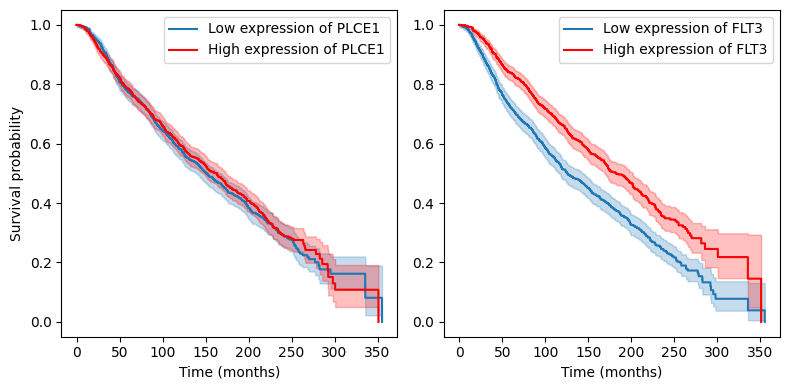

In [50]:
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

df = pd.read_csv('../data/metabric_example.tab', sep='\t')

# Calculate the median of the FLT3 column
median_flt3 = df['FLT3'].median()

# Create two groups: below and above median
flt3_low = df['FLT3'] <= median_flt3
flt3_high = df['FLT3'] > median_flt3


# Calculate the median of the PLCE1 column
median_plce1 = df['PLCE1'].median()

# Create two groups: below and above median
plce1_low = df['PLCE1'] <= median_plce1
plce1_high = df['PLCE1'] > median_plce1


fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(8, 4))

kmf = KaplanMeierFitter()
kmf_low = kmf.fit(df['time'][plce1_low], df['event'][plce1_low], label='Low expression of PLCE1')
kmf_low.plot_survival_function(ax=ax[0])

kmf_high = kmf.fit(df['time'][plce1_high], df['event'][plce1_high], label='High expression of PLCE1')
kmf_high.plot_survival_function(ax=ax[0], c='red')


kmf = KaplanMeierFitter()
kmf_low = kmf.fit(df['time'][flt3_low], df['event'][flt3_low], label='Low expression of FLT3')
kmf_low.plot_survival_function(ax=ax[1])

kmf_high = kmf.fit(df['time'][flt3_high], df['event'][flt3_high], label='High expression of FLT3')
kmf_high.plot_survival_function(ax=ax[1], c='red')

ax[0].set_ylabel("Survival probability")
ax[0].set_xlabel("Time (months)")
ax[1].set_xlabel("Time (months)")

fig.tight_layout()

plt.savefig('../figures/figure1_biomarker_example.pdf', dpi=300)
